In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X_train_raw = np.random.randint(0,8, size=(10000))

In [3]:
X = tf.placeholder(shape=[None], dtype=tf.int32)
Y = tf.placeholder(shape=[None], dtype=tf.int32)
# X_train.shape

In [4]:


Wf1 = tf.Variable(tf.random_normal([8,3]))
bf1 = tf.Variable(tf.random_normal([3]))

Wf2 = tf.Variable(tf.random_normal([3,8]))
bf2 = tf.Variable(tf.random_normal([8]))


In [5]:
X_oh = tf.one_hot(X, depth=8)

out1 = tf.nn.xw_plus_b(X_oh, Wf1, bf1)
drop1 = tf.nn.dropout(out1, keep_prob=0.2)
act1 = tf.nn.sigmoid(drop1)

mult2 = tf.nn.xw_plus_b(drop1, Wf2, bf2)
out2 = tf.nn.softmax(mult2)

In [9]:
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out2, labels=Y)
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)


In [10]:
batch_size = 1000
num_step = int(X_train_raw.shape[0]/batch_size)
epochs = 100

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(epochs):
        for i in range(num_step):
            train_step.run(feed_dict={X: X_train_raw[i*batch_size : (i+1)*batch_size], Y:X_train_raw[i*batch_size : (i+1)*batch_size]})
    
    output = act1.eval(feed_dict={X:np.asarray([0,1,2,3,4,5,6,7])})

In [15]:
output

array([[  1.55059824e-04,   5.00000000e-01,   5.00000000e-01],
       [  5.00000000e-01,   5.00000000e-01,   9.27760482e-01],
       [  5.00000000e-01,   5.00000000e-01,   5.00000000e-01],
       [  5.00000000e-01,   5.00000000e-01,   5.00000000e-01],
       [  5.00000000e-01,   5.00000000e-01,   2.83308357e-01],
       [  5.00000000e-01,   9.99999285e-01,   5.00000000e-01],
       [  5.00000000e-01,   9.55961585e-01,   5.00000000e-01],
       [  5.00000000e-01,   5.00000000e-01,   5.00000000e-01]], dtype=float32)

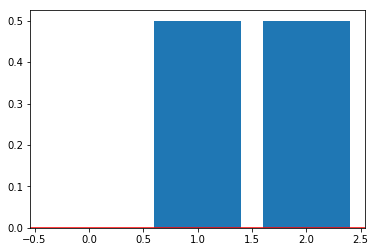

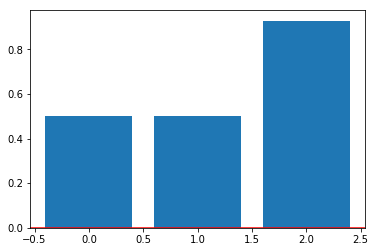

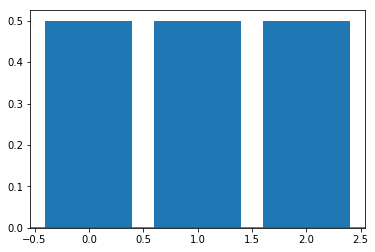

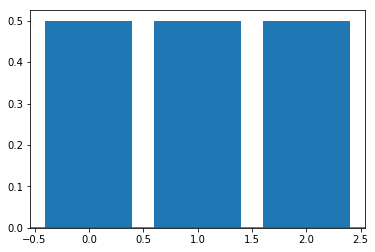

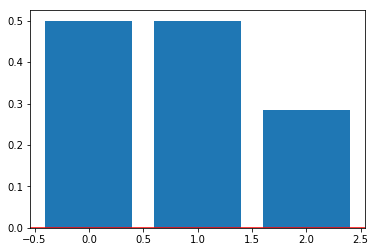

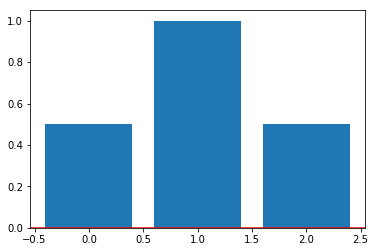

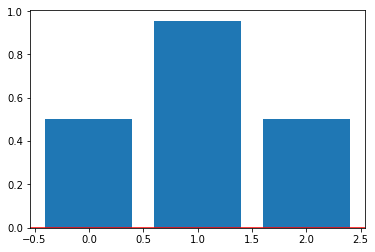

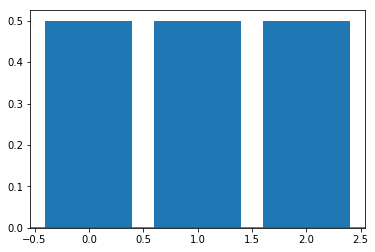

In [16]:
for i in output:
    plt.figure()
    plt.axhline(0, color='red')
#     p = i / np.linalg.norm(i)
    plt.bar([0,1,2], i)

In [21]:
for i in range(output.shape[0]):
    print(i, np.asarray(output[i] > 0.4, dtype=int))

0 [0 1 1]
1 [1 1 1]
2 [1 1 1]
3 [1 1 1]
4 [1 1 0]
5 [1 1 1]
6 [1 1 1]
7 [1 1 1]
